# V.1 Exploring the green reds

## a) Function that plots a scatterplot matrix

In [2]:
from matplotlib import scale
%load_ext Cython


In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/home/misha/UNIT/ml_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
red_wine_data = pd.read_csv('resources/winequality-white.csv', sep=';')
# Dictionary with column names which have space in the name as a key and replaced spaces to _ as value
columns_to_replace = {name: name.replace(' ', '_') for name in red_wine_data.columns if ' ' in name}

# Replace dataFrame colum names with spaces to names with '_' for better usability
red_wine_data.rename(columns=columns_to_replace, inplace=True)
red_wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# V.1 Exploring the green reds

## a) Function that plots a scatterplot matrix

In [5]:
def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False):
    features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'quality']
    features_amount = len(features) - 1
    
    data = wine_data[features]
    data = data[(data['quality'] >= good_threshold) | (data['quality'] <= bad_threshold)]
    
    good_wines = data[data['quality'] >= good_threshold]
    bad_wines = data[data['quality'] <= bad_threshold]    
    
    fig, axes = plt.subplots(nrows=features_amount, ncols=features_amount, figsize=(12,12))
    fig.subplots_adjust(hspace=0.0, wspace=0.0)

    for axis in axes.flat:
        pass
        # Hide all ticks and labels
        axis.xaxis.set_visible(False)
        axis.yaxis.set_visible(False)

    for i in range(features_amount):
        for j in range(features_amount):
            if i == j:
#                 axes[i, j].text(0.5, 0.5, features[i], ha='center', va='center')
                axes[i, i].annotate(features[i], (0.5, 0.5), xycoords='axes fraction', ha='center', va='center')
            else:
                axes[i, j].scatter(good_wines.iloc[:, j], good_wines.iloc[:, i], color='green', marker='o', s=6)
                axes[i, j].scatter(bad_wines.iloc[:, j], bad_wines.iloc[:, i], color='purple', marker='o', s=6)
    plt.show()
    if save_plot:
        fig.savefig('figure.png')

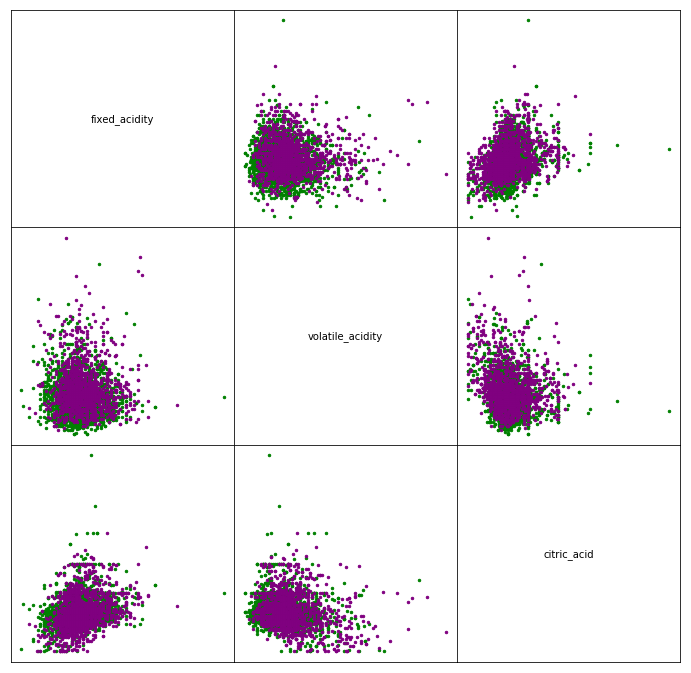

In [6]:
plot_scatter_matrix(red_wine_data, 6, 5)

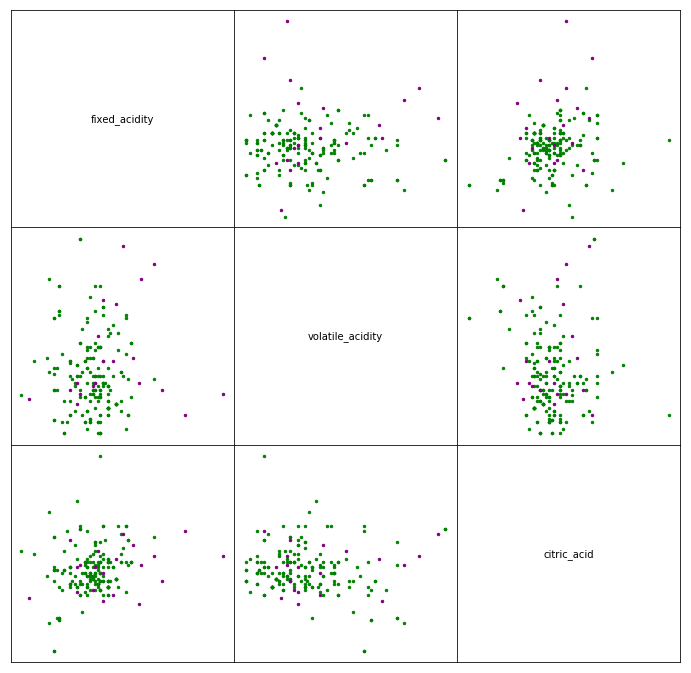

In [7]:
plot_scatter_matrix(red_wine_data, 8, 3)

## b)

/home/misha/UNIT/ml_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


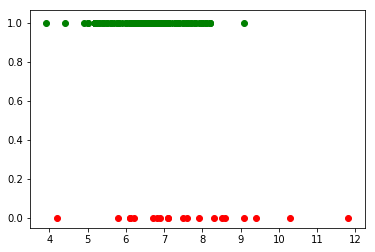

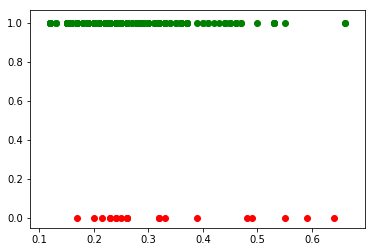

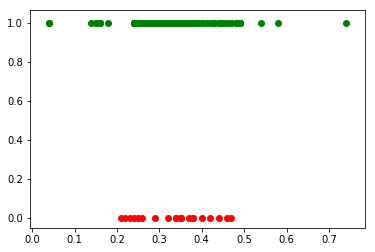

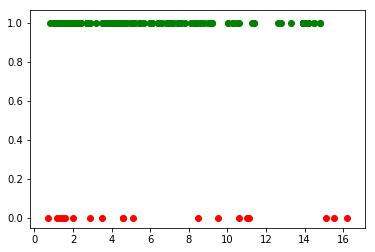

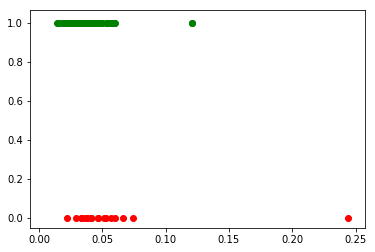

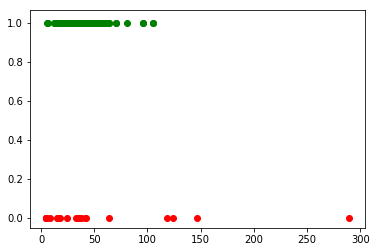

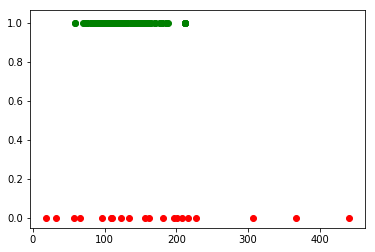

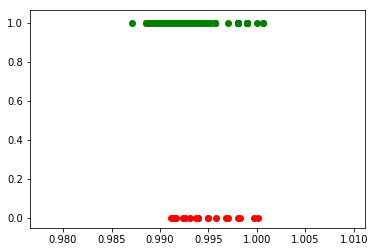

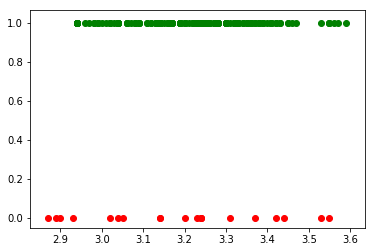

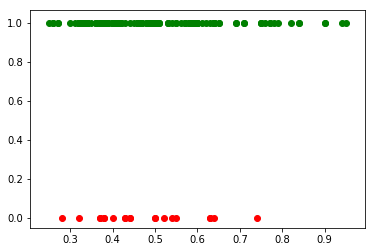

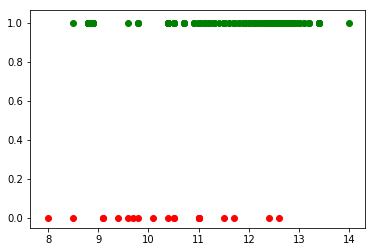

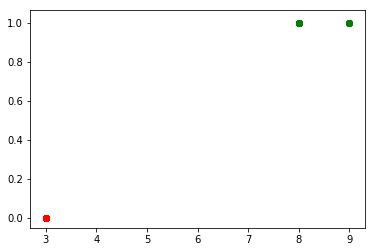

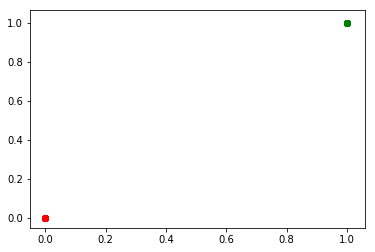

In [8]:
df = red_wine_data[(red_wine_data['quality'] >=8) | (red_wine_data['quality'] <= 3)]
df['y'] = df.apply(lambda data: 1 if data['quality'] >= 8 else 0, axis=1)
good = df[df['quality'] >= 8]
bad = df[df['quality'] <= 3]
# df.head(100)
# plt.scatter(df['fixed_acidity'], df['y'])
# plt.scatter(df['volatile_acidity'], df['y'])
# df.corr()
for col in df.columns:
    plt.scatter(good[col], good['y'], color='green')
    plt.scatter(bad[col], bad['y'], color='red')
    plt.show()
#     good.plot.scatter(x=col, y='y', color='DarkGreen', label='Group 2')
#     bad.plot.scatter(x=col, y='y', color='red', label='Group 2')

# Some correlation between clories and betwee fixed_acidity with y.

# V.2 Learning to perceptron

## a) Implement a perceptron that:
    • Has randomly initialized weights and bias
    • Uses the Rosenblatt perceptron learning rule (with changeable learning rate)
    • Utilizes the heaviside step activation function (discrete version)

In [62]:
import random


# Make a prediction with weights
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row) - 1):
        activation += weights[i + 1] * row[i]
    # Activation function is descrete 1 or 0
    return 1.0 if activation >= 0.0 else 0.0 
    # may be return 1.0 if activation >= 0.5 else 0.0 


# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
    # Random weights and bias initialization
    weights = [random.gauss(0.0, 0.01) for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0.0
        correct_predictions = 0.0
        for row in train:
            prediction = predict(row, weights)
            if prediction == row[-1]:
                correct_predictions += 1
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row) - 1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
        if epoch % 10000 == 0:
            accuracy = correct_predictions / float(len(train))
            print('>epoch=%d, lrate=%.3f, error=%.3f accuracy=%.3f' % (epoch, l_rate, sum_error, accuracy))
    return weights

In [64]:
l_rate = 0.01
n_epoch = 20000
weights = train_weights(dataset.values, l_rate, n_epoch)
print('weights', weights)

[0.004102773011557197, -0.014867176319388206, 0.006500300775688214]


#### b) You’ll need to implement a function to train your perceptron. Your training function should take in your red wine data as a parameter and should:
    • Have a way to specify number of training epochs
    • Train your perceptron until it makes no errors, if training epochs is set to 0,
    • Have a way to specify learning rate.
    • Return a list of python tuples containing (performance):
    
    [(current_epoch, num_errors_at_epoch_end, [array_of_weights], bias),...]

In [9]:
activation = sum(weight_i * x_i) + bias

NameError: name 'weight_i' is not defined

In [ ]:
prediction = 1.0 if activation >= 0.0 else 0.0

#### For the Perceptron algorithm, each iteration the weights (w) are updated using the equation:
w = w + learning_rate * (expected - predicted) * x

In [ ]:
w = w + learning_rate * (expected - predicted) * x

##### There is one weight for each input attribute, and these are updated in a consistent way, for example:
w(t+1)= w(t) + learning_rate * (expected(t) - predicted(t)) * x(t)

##### The bias is updated in a similar way, except without an input as it is not associated with a specific input value:
bias(t+1) = bias(t) + learning_rate * (expected(t) - predicted(t))


In [28]:
df = red_wine_data[(red_wine_data['quality'] >=8) | (red_wine_data['quality'] <= 3)]
df['y'] = df.apply(lambda data: 1 if data['quality'] >= 6 else 0, axis=1)

# dataset = df.drop('quality', 1).drop('alcohol', 1).drop('density', 1)
dataset = df[['alcohol', 'pH', 'y']]
dataset.head(20)

/home/misha/UNIT/ml_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,alcohol,pH,y
17,12.8,3.33,1
20,12.8,3.33,1
22,10.5,3.47,1
68,10.7,3.33,1
74,10.7,3.33,1
158,12.1,3.36,1
159,12.1,3.36,1
188,12.7,3.26,1
251,9.8,3.02,0
253,11.7,3.53,0


##### Below is a function named predict() that predicts an output value for a row given a set of weights.

The first weight is always the bias as it is standalone and not responsible for a specific input value.

In [40]:
import random


# Make a prediction with weights
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row) - 1):
        activation += weights[i + 1] * row[i]
    # Activation function is descrete 1 or 0
    return 1.0 if activation >= 0.0 else 0.0 
    # may be return 1.0 if activation >= 0.5 else 0.0 


# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
    # Random weights and bias initialization
    weights = [random.gauss(0.0, 0.01) for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0.0
        correct_predictions = 0.0
        for row in train:
            prediction = predict(row, weights)
            if prediction == row[-1]:
                correct_predictions += 1
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row) - 1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
        if epoch % 10000 == 0:
            accuracy = correct_predictions / float(len(train))
            print('>epoch=%d, lrate=%.3f, error=%.3f accuracy=%.3f' % (epoch, l_rate, sum_error, accuracy))
    return weights

# df2 = red_wine_data
# df2['y'] = red_wine_data.apply(lambda data: 1 if data['quality'] >= 7 else 0, axis=1)
# dataset = df2.drop('quality', 1).drop('alcohol', 1)
# dataset = df.drop('quality', 1).drop('alcohol', 1)

l_rate = 0.01
n_epoch = 200000
weights = train_weights(dataset.values, l_rate, n_epoch)
print(weights)


>epoch=0, lrate=0.010, error=32.000 accuracy=0.840
>epoch=10000, lrate=0.010, error=29.000 accuracy=0.855
>epoch=20000, lrate=0.010, error=32.000 accuracy=0.840
>epoch=30000, lrate=0.010, error=31.000 accuracy=0.845
>epoch=40000, lrate=0.010, error=26.000 accuracy=0.870
>epoch=50000, lrate=0.010, error=30.000 accuracy=0.850
>epoch=60000, lrate=0.010, error=32.000 accuracy=0.840
>epoch=70000, lrate=0.010, error=30.000 accuracy=0.850


KeyboardInterrupt: 

In [61]:
random.gauss(0.0, 0.01)

0.005061925307601296

In [489]:
%%cython
from cpython cimport array
import array

# def array.array a = array.array(l1)
cdef array.array a = array.array('i', [1, 2, 3])
print(a)
a

In [528]:
dataset.head()
# dataset.values[0, 0]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,y
17,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,1
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,1
22,6.8,0.26,0.42,1.7,0.049,41.0,122.0,0.9930,3.47,0.48,10.5,1
68,6.7,0.23,0.31,2.1,0.046,30.0,96.0,0.9926,3.33,0.64,10.7,1
74,6.7,0.23,0.31,2.1,0.046,30.0,96.0,0.9926,3.33,0.64,10.7,1


(<Figure size 432x288 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8481e2bbe0>,
       dtype=object))

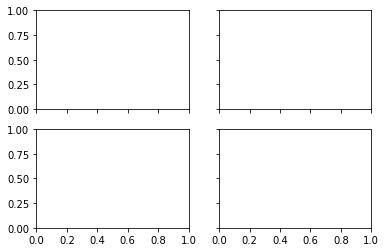

In [12]:
plt.subplots(2, 2, sharex='all', sharey='all')
